In [ ]:
import pandas as pd

In [ ]:
# Read training data from json into a dataframe
train_data_df = pd.read_json('train.json')

In [36]:
train_data_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [37]:
import matplotlib.pyplot as plt

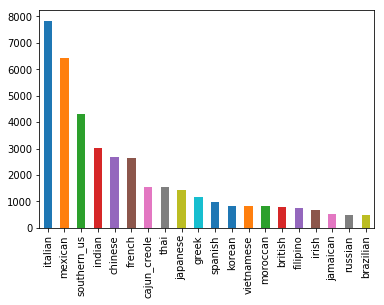

In [39]:
train_data_df['cuisine'].value_counts().plot(kind='bar')

In [40]:
from collections import Counter

In [44]:
# Count the number of recipes in which a unique ingredient is appearing in each cuisine
count_ingredients_cuisine = {}
for cuisine in train_data_df['cuisine'].unique():
    count_ingredients_cuisine[cuisine] = Counter()
    cuisine_indices = (train_data_df['cuisine'] == cuisine)
    for ingredients in train_data_df[cuisine_indices]['ingredients']:
        count_ingredients_cuisine[cuisine].update(ingredients)

In [45]:
count_ingredients_cuisine['indian']

Counter({'water': 820,
         'vegetable oil': 593,
         'wheat': 3,
         'salt': 1934,
         'black pepper': 161,
         'shallots': 56,
         'cornflour': 6,
         'cayenne pepper': 249,
         'onions': 1195,
         'garlic paste': 221,
         'milk': 158,
         'butter': 273,
         'lemon juice': 271,
         'chili powder': 485,
         'passata': 13,
         'oil': 546,
         'ground cumin': 683,
         'boneless chicken skinless thigh': 62,
         'garam masala': 862,
         'double cream': 15,
         'natural yogurt': 16,
         'bay leaf': 118,
         'tumeric': 492,
         'vegetable stock': 38,
         'tomatoes': 521,
         'naan': 31,
         'red lentils': 84,
         'red chili peppers': 165,
         'spinach': 63,
         'sweet potatoes': 56,
         'salmon fillets': 18,
         'cumin seed': 697,
         'fresh cilantro': 106,
         'curry powder': 403,
         'serrano chile': 92,
         'fresh gi

## Preprocessing

In [ ]:
# Separate train data
train_data_list = [ingredients for ingredients in list(train_data_df['ingredients'])]
train_data_list # A 2D list

In [ ]:
# Separate train labels
train_label_list = [cuisine for cuisine in list(train_data_df['cuisine'])]
train_label_list

In [ ]:
# Replace blank spaces with underscores
def remove_white_space(list):
    string_of_words = ''
    for sublist in list:
        string_of_words += ' '.join(string.replace(' ', '_') for string in sublist)
    return string_of_words.split(' ')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(token_pattern='[a-zA-Z]+_*[a-zA-Z]+')
train_data_vectorized = vectorizer.fit_transform(list_of_ingredients)
print(train_data_vectorized)

In [ ]:
vectorizer.vocabulary_

In [ ]:
list_of_ingredients = remove_white_space(train_data_list)
len(list_of_ingredients)
list_of_ingredients